## Exploring about Global Temperatures

Global warming is one of the most debated subjects by scientists. We can define global warming as the long-term rise in the average temperature of the earth. So far, a lot of data proves that this is happening, but does it is true? Based on that, let's take a closer look at this database about climate change. For it, we can create visualization models using these datasets to see more clearly what has been happening to the planet in recent years.

**kernel status: In improvement**

<img src="https://cdn.80000hours.org/wp-content/uploads/2016/04/Climate-change-extreme-risks_HR.jpg">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from mpl_toolkits.basemap import Basemap
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline 

global_temp = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv', parse_dates=['dt'])
cities_temp = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv', parse_dates=['dt'])
country_temp = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv',parse_dates=['dt'])
global_temp.head(4)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
cities_temp.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
country_temp.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland


In [4]:
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [5]:
cities_temp.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [6]:
country_temp.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

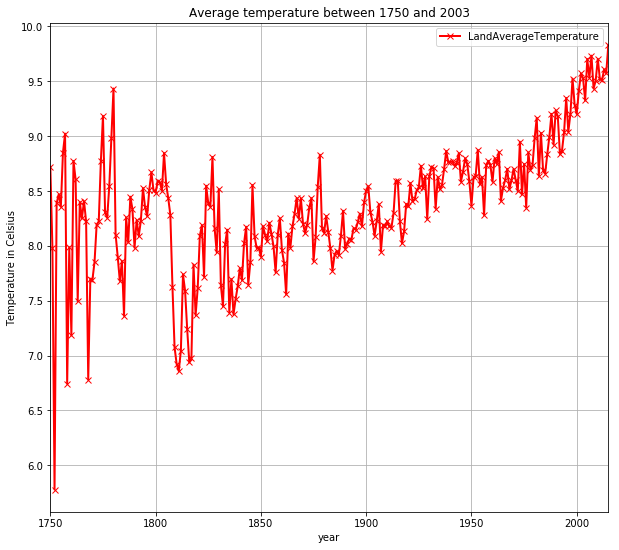

In [7]:
plt.figure (figsize = (10, 9))
temperature_by_year = global_temp.groupby(global_temp.dt.dt.year).mean()
temperature_by_year.LandAverageTemperature.plot(linewidth=2, color='red',marker='x')
plt.title('Average temperature between 1750 and 2003')
plt.xlabel('year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()

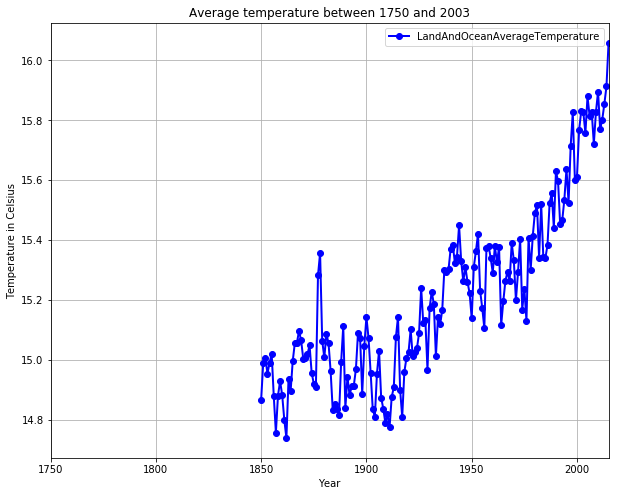

In [8]:
plt.figure (figsize = (10, 8))
temperature_by_year = global_temp.groupby(global_temp.dt.dt.year).mean()
temperature_by_year.LandAndOceanAverageTemperature.plot(linewidth=2, color='blue',marker='o')

plt.title('Average temperature between 1750 and 2003')
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()

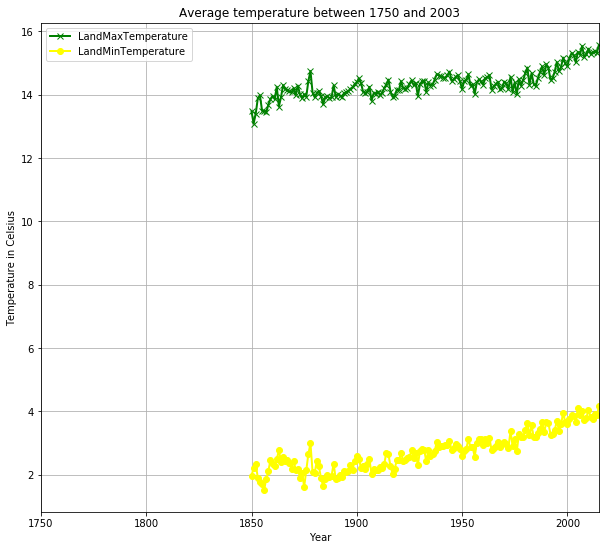

In [9]:
plt.figure (figsize = (10, 9))
temperature_by_year = global_temp.groupby(global_temp.dt.dt.year).mean()
temperature_by_year.LandMaxTemperature.plot(linewidth=2, color='green',marker='x')
temperature_by_year.LandMinTemperature.plot(linewidth=2, color='yellow',marker='o')
plt.title('Average temperature between 1750 and 2003')
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


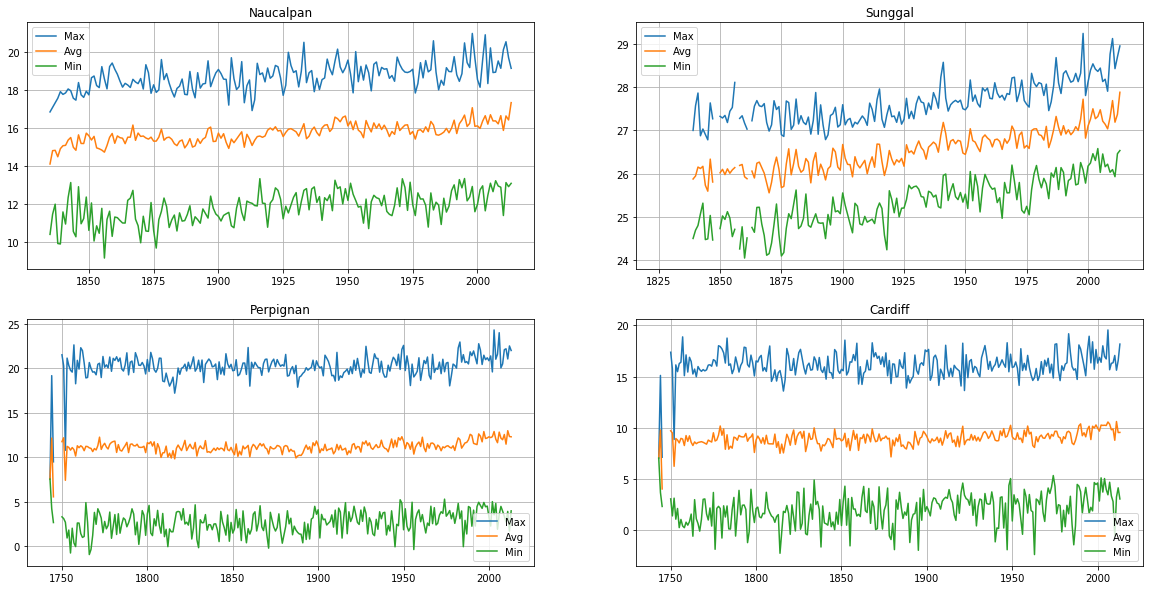

In [10]:
def getAvg(db, year, name, label):
    return db.groupby([name, year])[label].mean().unstack()

def getMin(db, year, name, label):
    return db.groupby([name, year])[label].min().unstack()

def getMax(db, year, name, label):
    return db.groupby([name, year])[label].max().unstack()

year = cities_temp.dt.dt.year
label = 'AverageTemperature'
cityAvg = getAvg(cities_temp, year, 'City', label)
cityMin = getMin(cities_temp, year, 'City', label)
cityMax = getMax(cities_temp, year, 'City', label)

fig = plt.figure(figsize=(20,10))
color = ['red','green','blue','yellow']
subplot = [221,222,223,224]
for index in range(0, 4):
    searchRandom = cityAvg.sample(10).index
    for name_city in searchRandom:
        rowAvg = cityAvg.loc[name_city] 
        rowMin = cityMin.loc[name_city] 
        rowMax = cityMax.loc[name_city] 
   
    ax1 = fig.add_subplot(subplot[index]) 
    ax1.set_title(rowMax.name)
    ax1.grid()
    ax1.plot(rowMax, label="Max")
    leg = ax1.legend()
    
    ax2 = fig.add_subplot(subplot[index]) 
    ax2.set_title(rowAvg.name)
    ax2.grid()
    ax2.plot(rowAvg, label="Avg")
    leg = ax2.legend()
    
    ax3 = fig.add_subplot(subplot[index]) 
    ax3.set_title(rowMin.name)
    ax3.grid()
    ax3.plot(rowMin, label="Min")
    leg = ax3.legend()

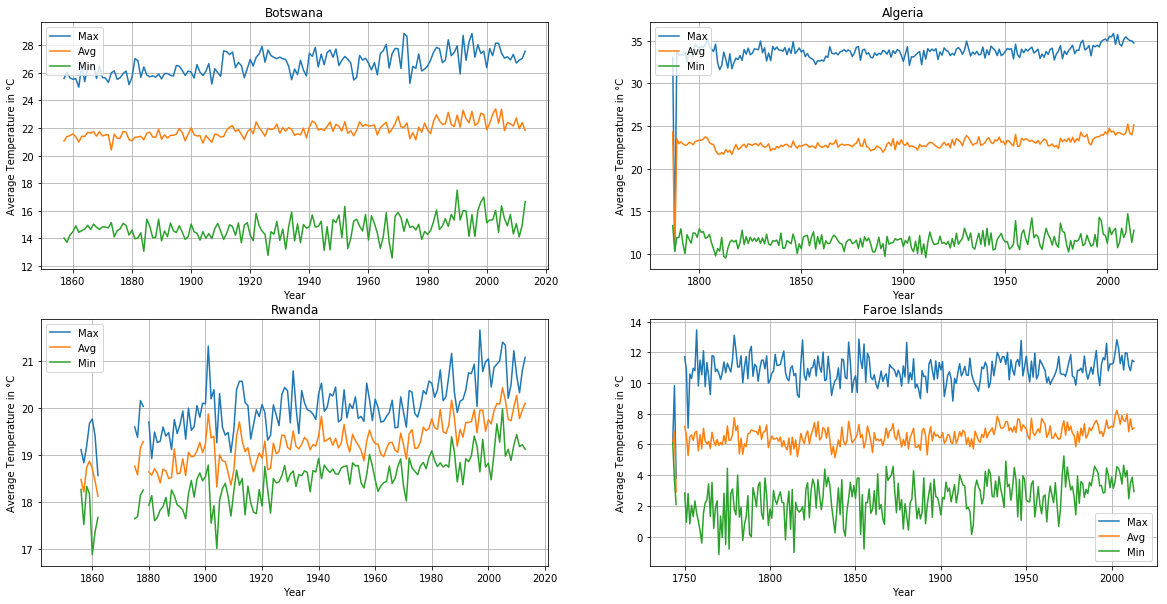

In [11]:
year = country_temp.dt.dt.year
label = 'AverageTemperature'
countryAvg = getAvg(country_temp, year, 'Country', label)
countryMin = getMin(country_temp, year, 'Country', label)
countryMax = getMax(country_temp, year, 'Country', label)

fig = plt.figure(figsize=(20,10))
subplot = [221,222,223,224]
for index in range(0, 4):
    searchRandom = countryAvg.sample(10).index
    for name_country in searchRandom:
        rowAvg = countryAvg.loc[name_country] 
        rowMin = countryMin.loc[name_country] 
        rowMax = countryMax.loc[name_country] 
   
    ax1 = fig.add_subplot(subplot[index]) 
    ax1.set_title(rowMax.name)
    ax1.grid()
    ax1.plot(rowMax, label="Max")
    leg = ax1.legend()
    
    ax2 = fig.add_subplot(subplot[index]) 
    ax2.set_title(rowAvg.name)
    ax2.grid()
    ax2.plot(rowAvg, label="Avg")
    leg = ax2.legend()
    
    ax3 = fig.add_subplot(subplot[index]) 
    ax3.set_title(rowMin.name)
    ax3.grid()
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Average Temperature in °C')
    ax3.plot(rowMin, label="Min")
    leg = ax3.legend()

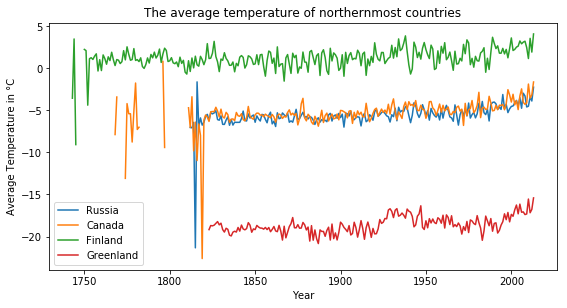

In [12]:
Russia = countryAvg.loc['Russia']
Canada = countryAvg.loc['Canada']
Greenland = countryAvg.loc['Greenland']
Finland = countryAvg.loc['Finland']

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221) 
ax1.plot(Russia, label="Russia")
ax1.plot(Canada, label="Canada")
ax1.plot(Finland, label="Finland")
ax1.plot(Greenland, label="Greenland")
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature in °C')
ax1.set_title("The average temperature of northernmost countries")
leg = ax1.legend()

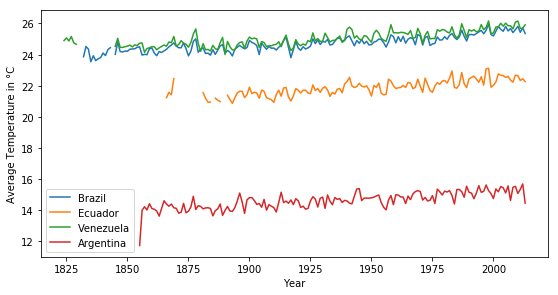

In [13]:
Brazil = countryAvg.loc['Brazil']
Ecuador = countryAvg.loc['Ecuador']
Venezuela = countryAvg.loc['Venezuela']
Argentina = countryAvg.loc['Argentina']

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221) 
ax1.plot(Brazil, label="Brazil")
ax1.plot(Ecuador, label="Ecuador")
ax1.plot(Venezuela, label="Venezuela")
ax1.plot(Argentina, label="Argentina")
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature in °C')
leg = ax1.legend()